In [1]:
from wordcloud import WordCloud, STOPWORDS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'C:\Users\15512\Desktop\Projects\Nike Price Prediction\nike_data_2022_09.csv')

In [4]:
data

,url,name,sub_title,brand,model,color,price,currency,availability,description,raw_description,avg_rating,review_count,images,available_sizes,uniq_id,scraped_at
0,https://www.nike.com/t/dri-fit-team-minnesota-...,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Nike,14226571,Navy,40.00,USD,InStock,SWEAT-WICKING COMFORT.The Nike Dri-FIT Team (M...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,S | M | L | XL | 2XL,c3229e54-aa58-5fdd-9f71-fbe66366b2b2,20/09/2022 23:32:28
1,https://www.nike.com/t/club-américa-womens-dri...,Club América,Women's Nike Dri-FIT Soccer Jersey Dress,Nike,13814665,Black/Black,90.00,USD,InStock,"Inspired by traditional soccer jerseys, the Cl...","<div class=""pi-pdpmainbody""><br/><p>Inspired b...",5.0,1.0,https://static.nike.com/a/images/t_PDP_1280_v1...,L (12–14),f8ebb2ed-17ae-5719-b750-5ea3ec69b75c,20/09/2022 23:32:40
2,https://www.nike.com/t/sportswear-swoosh-mens-...,Nike Sportswear Swoosh,Men's Overalls,Nike,13015648,Black/White,140.00,USD,OutOfStock,WORKING HARD TO KEEP YOU COMFORTABLE.The Nike ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",4.9,11.0,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,88120081-e6cb-5399-b9dc-a2d3d5dd5206,20/09/2022 23:33:16
3,https://www.nike.com/t/dri-fit-one-luxe-big-ki...,Nike Dri-FIT One Luxe,Big Kids' (Girls') Printed Tights (Extended Size),Nike,13809796,Black/Rush Pink,22.97,USD,OutOfStock,ELEVATED COMFORT GOES FULL BLOOM.The Nike Dri-...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,98348cc5-1520-5b6e-a5f6-c42547b6a092,20/09/2022 23:33:17
4,https://www.nike.com/t/paris-saint-germain-rep...,Paris Saint-Germain Repel Academy AWF,Big Kids' Soccer Jacket,Nike,13327415,Dark Grey/Black/Siren Red/Siren Red,70.00,USD,InStock,WATER-REPELLENT COVERAGE GETS PSG DETAILS.The ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,XS | S | M | L | XL,f15981a5-d8c9-53fa-880d-80606be188fe,20/09/2022 23:33:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,https://www.nike.com/t/air-jordan-xxxv-low-ds-...,Air Jordan XXXV Low DS PF,Basketball Shoes,Nike,13167172,Hyper Jade/Bright Crimson/Blue Orbit/Metallic ...,165.00,USD,InStock,Basketball players create separation by cutti...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,2778fd91-d3b6-579c-91c2-561ab93681ec,20/09/2022 23:52:32
108,https://www.nike.com/t/dri-fit-ucla-mens-polo-...,Nike College Dri-FIT (UCLA),Men's Polo,Nike,14045780,Signal Blue,50.00,USD,InStock,With Bruins details on a time-tested silhouet...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,S | XL | 2XL,d3ed0169-244e-5ee0-8ac4-fce2b4555998,20/09/2022 23:52:48
109,https://www.nike.com/t/jordan-big-kids-boys-fu...,Jordan,Big Kids' (Boys') Full-Zip Jacket,Nike,13847339,Black,75.00,USD,OutOfStock,FUZZY FIT FOR COLD TEMPS.The Jordan Jacket is ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,0a73c673-3f1e-5761-91aa-a10db4092973,20/09/2022 23:52:48
110,https://www.nike.com/t/los-angeles-rams-vapor-...,NFL Los Angeles Rams Nike Vapor Untouchable (M...,Men's Limited Football Jersey,Nike,14006895,White,160.00,USD,InStock,GRIDIRON LOOK.The NFL Los Angeles Rams Nike Va...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,M | L | XL | 2XL,e951cdc6-9c76-54f7-b23b-6cae9133c54d,20/09/2022 23:52:53


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              112 non-null    object 
 1   name             112 non-null    object 
 2   sub_title        112 non-null    object 
 3   brand            112 non-null    object 
 4   model            112 non-null    int64  
 5   color            110 non-null    object 
 6   price            112 non-null    float64
 7   currency         112 non-null    object 
 8   availability     108 non-null    object 
 9   description      112 non-null    object 
 10  raw_description  112 non-null    object 
 11  avg_rating       23 non-null     float64
 12  review_count     23 non-null     float64
 13  images           108 non-null    object 
 14  available_sizes  56 non-null     object 
 15  uniq_id          112 non-null    object 
 16  scraped_at       112 non-null    object 
dtypes: float64(3), i

In [6]:
data['color'].value_counts()

Black                        15
White                         9
Navy                          3
Black/White                   3
Multi-Color                   3
                             ..
Charcoal Heather/Red          1
Black/Black/Black             1
Black/Black                   1
Multi-Color/Lavender Mist     1
Orange                        1
Name: color, Length: 76, dtype: int64

<Axes: xlabel='avg_rating'>

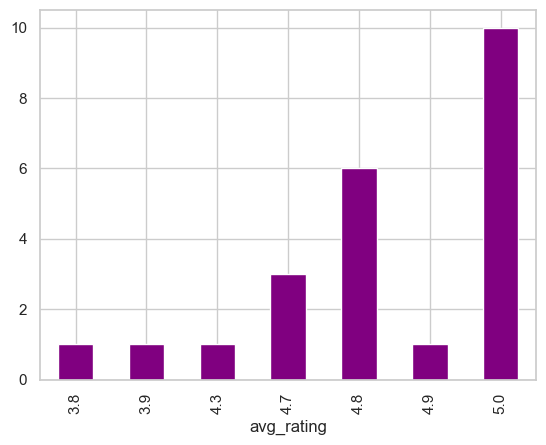

In [12]:
data.groupby('avg_rating').price.count().plot(kind='bar',color='purple')


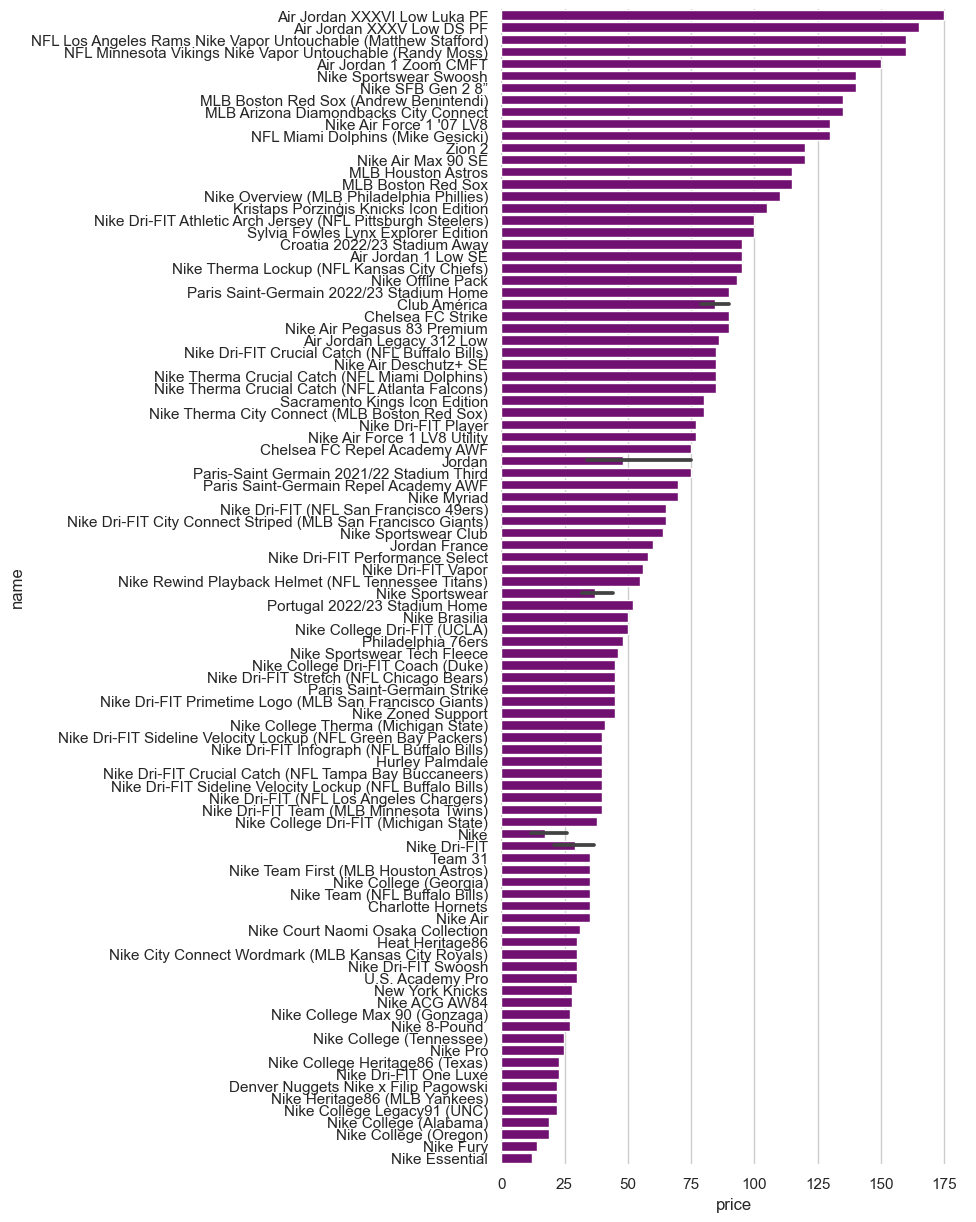

In [10]:
df_sorted=data.sort_values("price", ascending=False)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="name", data=df_sorted,
            label="Price of nike", color="purple")
sns.despine(left=True, bottom=True)

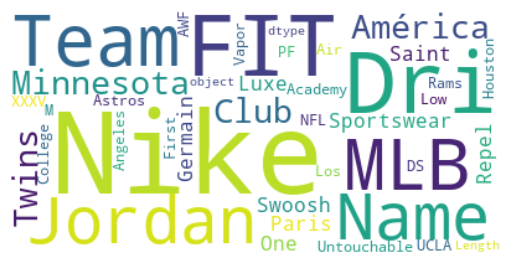

In [13]:
df=data.copy()
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    
    stopwords=STOPWORDS
)


# generate the word cloud
alice_wc.generate(str(df['name']))
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
df2=df[['price','availability','avg_rating','review_count']]

In [16]:
df2

,price,availability,avg_rating,review_count
0,40.00,InStock,NaN,NaN
1,90.00,InStock,5.0,1.0
2,140.00,OutOfStock,4.9,11.0
3,22.97,OutOfStock,NaN,NaN
4,70.00,InStock,NaN,NaN
...,...,...,...,...
107,165.00,InStock,NaN,NaN
108,50.00,InStock,NaN,NaN
109,75.00,OutOfStock,NaN,NaN
110,160.00,InStock,NaN,NaN


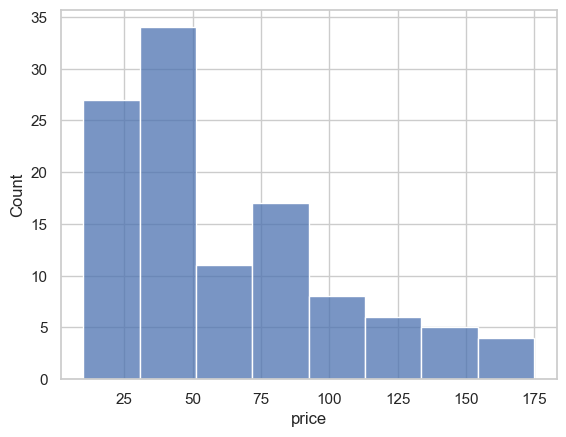

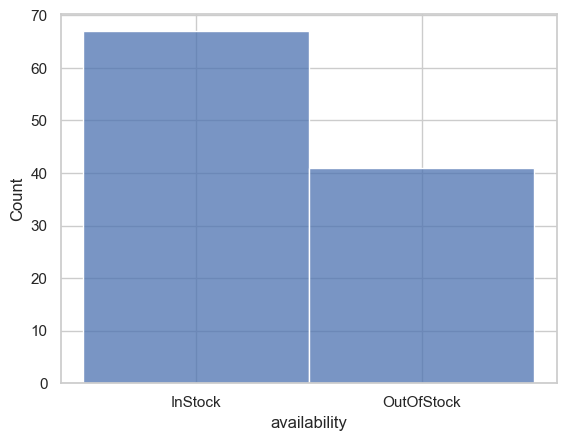

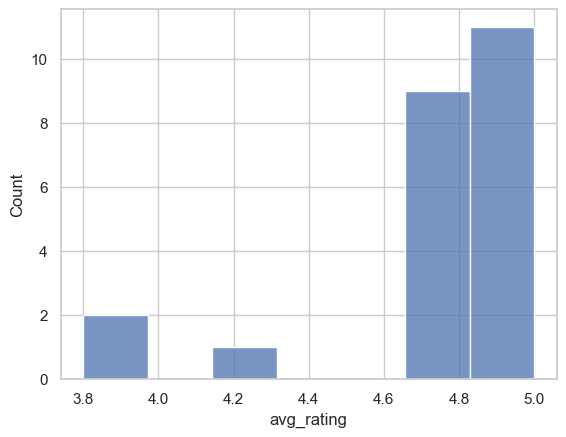

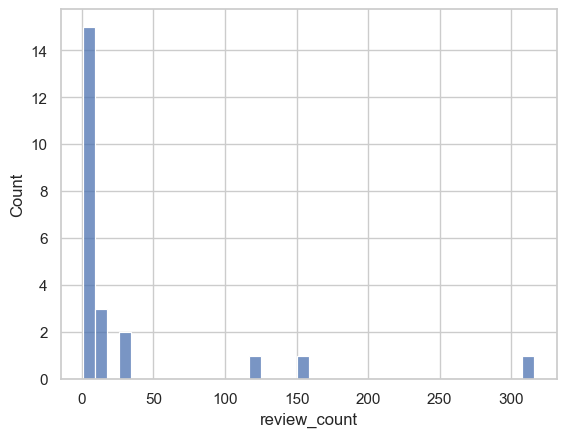

In [15]:
for column in df2.columns:
    
    sns.histplot(df2[column])
    plt.show()

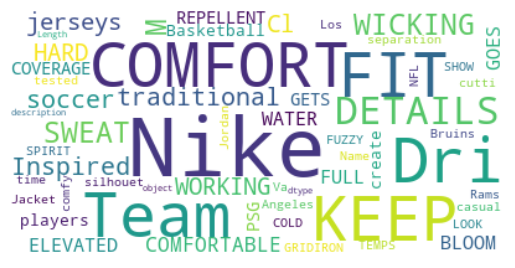

In [17]:
df3=df[['description']]

    
    # instantiate a word cloud object
alice_wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=STOPWORDS
    )
for column in df3.columns:
    # generate the word cloud
    alice_wc.generate(str(df[column]))
    # display the word cloud
    plt.imshow(alice_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

<Axes: >

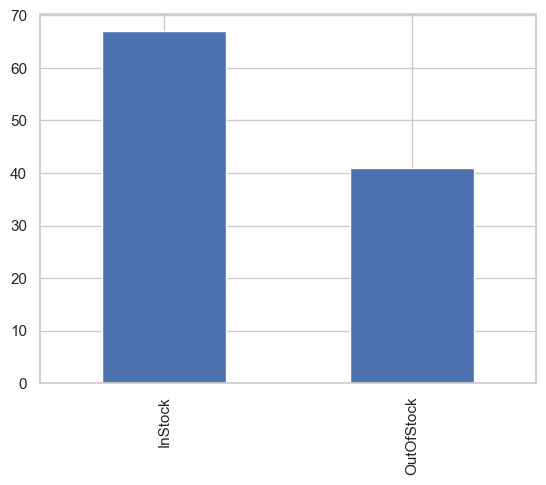

In [18]:
df['availability'].value_counts().plot(kind='bar')

In [19]:
df.groupby(df['name']).price.agg([min,max])

,min,max
name,,
Air Jordan 1 Low SE,95.00,95.00
Air Jordan 1 Zoom CMFT,150.00,150.00
Air Jordan Legacy 312 Low,85.97,85.97
Air Jordan XXXV Low DS PF,165.00,165.00
Air Jordan XXXVI Low Luka PF,175.00,175.00
...,...,...
Sacramento Kings Icon Edition,80.00,80.00
Sylvia Fowles Lynx Explorer Edition,100.00,100.00
Team 31,35.00,35.00


In [20]:
df.groupby(['name','color']).price.max()

name                                 color                                               
Air Jordan 1 Low SE                  Psychic Blue/Vivid Green/Safety Orange/Sail              95.00
Air Jordan 1 Zoom CMFT               Fossil Stone/Fossil Rose/Psychic Purple/White           150.00
Air Jordan Legacy 312 Low            Black/White/Metallic Gold                                85.97
Air Jordan XXXV Low DS PF            Hyper Jade/Bright Crimson/Blue Orbit/Metallic Silver    165.00
Air Jordan XXXVI Low Luka PF         Laser Blue/Electro Purple/Pink Prime/Electric Green     175.00
                                                                                              ...  
Sacramento Kings Icon Edition        Field Purple/Dark Steel Grey/White/White                 80.00
Sylvia Fowles Lynx Explorer Edition  Court Blue/College Navy                                 100.00
Team 31                              Black                                                    35.00
U.S. Acade

C:\Users\15512\Downloads\Anaconda\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\15512\Downloads\Anaconda\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\15512\Downloads\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\15512\Downloads\Anaconda\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\15512\Downloads\Anaconda\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\15512\Downloads\Anaconda\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\15512\Downloads\Anaconda\lib\s

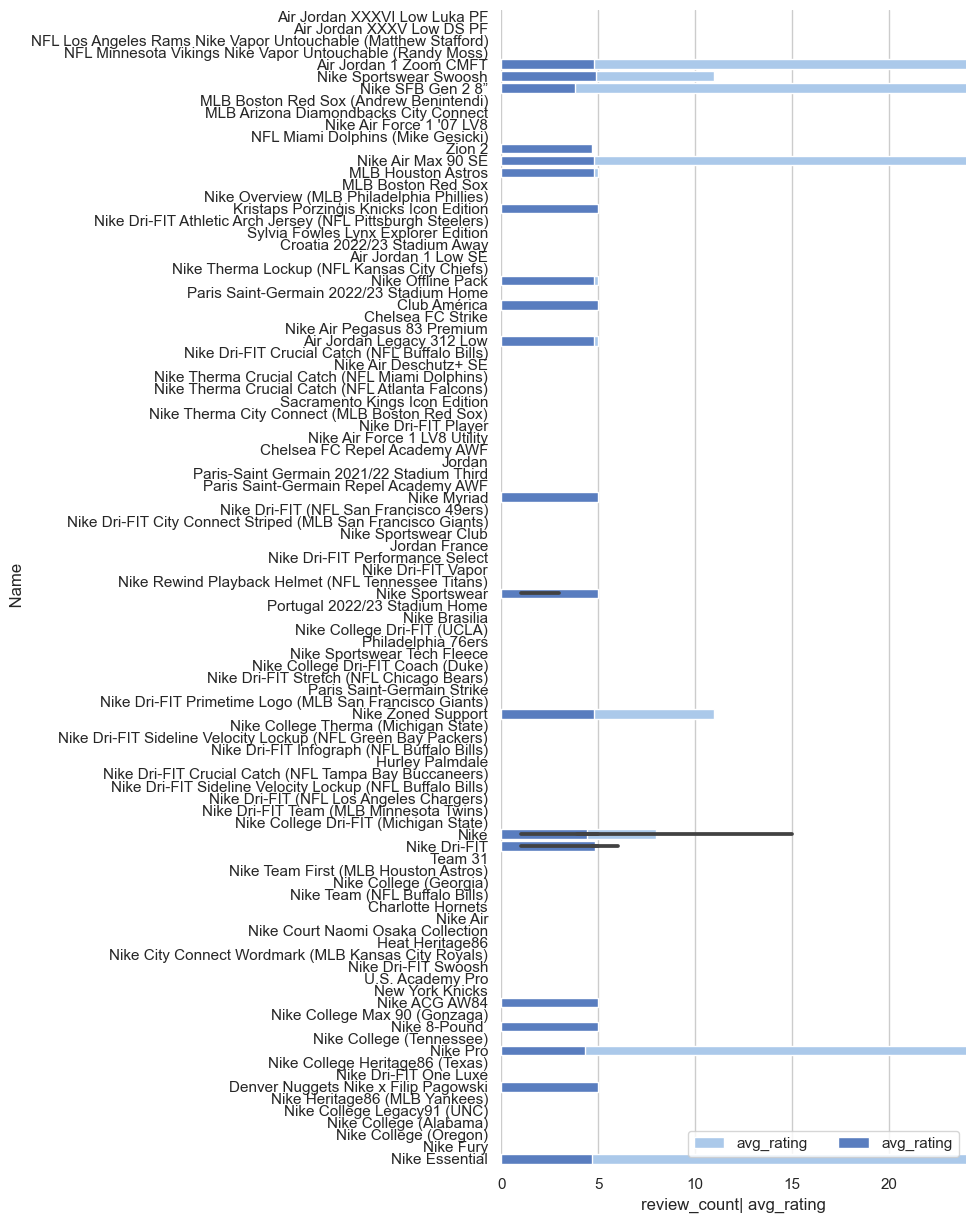

In [21]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="review_count", y="name", data=df_sorted,
            label="avg_rating", color="b")

sns.set_color_codes("muted")
sns.barplot(x="avg_rating", y="name", data=df_sorted,
            label="avg_rating", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel=" Name",
       xlabel="review_count| avg_rating")
sns.despine(left=True, bottom=True)

In [22]:
df

,url,name,sub_title,brand,model,color,price,currency,availability,description,raw_description,avg_rating,review_count,images,available_sizes,uniq_id,scraped_at
0,https://www.nike.com/t/dri-fit-team-minnesota-...,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Nike,14226571,Navy,40.00,USD,InStock,SWEAT-WICKING COMFORT.The Nike Dri-FIT Team (M...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,S | M | L | XL | 2XL,c3229e54-aa58-5fdd-9f71-fbe66366b2b2,20/09/2022 23:32:28
1,https://www.nike.com/t/club-américa-womens-dri...,Club América,Women's Nike Dri-FIT Soccer Jersey Dress,Nike,13814665,Black/Black,90.00,USD,InStock,"Inspired by traditional soccer jerseys, the Cl...","<div class=""pi-pdpmainbody""><br/><p>Inspired b...",5.0,1.0,https://static.nike.com/a/images/t_PDP_1280_v1...,L (12–14),f8ebb2ed-17ae-5719-b750-5ea3ec69b75c,20/09/2022 23:32:40
2,https://www.nike.com/t/sportswear-swoosh-mens-...,Nike Sportswear Swoosh,Men's Overalls,Nike,13015648,Black/White,140.00,USD,OutOfStock,WORKING HARD TO KEEP YOU COMFORTABLE.The Nike ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",4.9,11.0,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,88120081-e6cb-5399-b9dc-a2d3d5dd5206,20/09/2022 23:33:16
3,https://www.nike.com/t/dri-fit-one-luxe-big-ki...,Nike Dri-FIT One Luxe,Big Kids' (Girls') Printed Tights (Extended Size),Nike,13809796,Black/Rush Pink,22.97,USD,OutOfStock,ELEVATED COMFORT GOES FULL BLOOM.The Nike Dri-...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,98348cc5-1520-5b6e-a5f6-c42547b6a092,20/09/2022 23:33:17
4,https://www.nike.com/t/paris-saint-germain-rep...,Paris Saint-Germain Repel Academy AWF,Big Kids' Soccer Jacket,Nike,13327415,Dark Grey/Black/Siren Red/Siren Red,70.00,USD,InStock,WATER-REPELLENT COVERAGE GETS PSG DETAILS.The ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,XS | S | M | L | XL,f15981a5-d8c9-53fa-880d-80606be188fe,20/09/2022 23:33:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,https://www.nike.com/t/air-jordan-xxxv-low-ds-...,Air Jordan XXXV Low DS PF,Basketball Shoes,Nike,13167172,Hyper Jade/Bright Crimson/Blue Orbit/Metallic ...,165.00,USD,InStock,Basketball players create separation by cutti...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,2778fd91-d3b6-579c-91c2-561ab93681ec,20/09/2022 23:52:32
108,https://www.nike.com/t/dri-fit-ucla-mens-polo-...,Nike College Dri-FIT (UCLA),Men's Polo,Nike,14045780,Signal Blue,50.00,USD,InStock,With Bruins details on a time-tested silhouet...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,S | XL | 2XL,d3ed0169-244e-5ee0-8ac4-fce2b4555998,20/09/2022 23:52:48
109,https://www.nike.com/t/jordan-big-kids-boys-fu...,Jordan,Big Kids' (Boys') Full-Zip Jacket,Nike,13847339,Black,75.00,USD,OutOfStock,FUZZY FIT FOR COLD TEMPS.The Jordan Jacket is ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,0a73c673-3f1e-5761-91aa-a10db4092973,20/09/2022 23:52:48
110,https://www.nike.com/t/los-angeles-rams-vapor-...,NFL Los Angeles Rams Nike Vapor Untouchable (M...,Men's Limited Football Jersey,Nike,14006895,White,160.00,USD,InStock,GRIDIRON LOOK.The NFL Los Angeles Rams Nike Va...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,M | L | XL | 2XL,e951cdc6-9c76-54f7-b23b-6cae9133c54d,20/09/2022 23:52:53


In [23]:
df.columns

Index(['url', 'name', 'sub_title', 'brand', 'model', 'color', 'price',
       'currency', 'availability', 'description', 'raw_description',
       'avg_rating', 'review_count', 'images', 'available_sizes', 'uniq_id',
       'scraped_at'],
      dtype='object')